In [25]:
# # # Apply Borderline-SMOTE
# # border_smote = BorderlineSMOTE(random_state=42)
# # X_train_resampled, y_train_resampled = border_smote.fit_resample(X_train, y_train)

# # adasyn = ADASYN(random_state=42)
# # X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# # # Apply SVM SMOTE
# # svm_smote = SVMSMOTE(random_state=42)
# # X_train_resampled, y_train_resampled = svm_smote.fit_resample(X_train, y_train)

# # # Apply Random Over-Sampling
# # ros = RandomOverSampler(random_state=42)
# # X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# # # Apply Cluster Centroids
# # cc = ClusterCentroids(random_state=42)
# # X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

# # # Apply NearMiss
# # nm = NearMiss()
# # X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# # Check the number of samples before and after SMOTE
# print(f"Before SMOTE: {np.bincount(y_train)}")
# print(f"After SMOTE: {np.bincount(y_train_resampled)}")

# # # Step 4: Initialize Random Forest and define the parameter grid for Randomized Search
# # rf_model = RandomForestClassifier(random_state=42)

# # param_grid = {
# #     'n_estimators': [100, 200, 300, 400, 500],
# #     'max_depth': [None, 10, 20, 30, 40, 50],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4],
# #     'max_features': ['sqrt', 'log2'],
# #     'bootstrap': [True, False]
# # }

# # # Step 5: Initialize RandomizedSearchCV
# # random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
# #                                    n_iter=10, cv=10, error_score='raise', verbose=2, random_state=42, n_jobs=-1)

# # # Step 6: Fit RandomizedSearchCV to find the best parameters
# # random_search.fit(X_train_resampled, y_train_resampled)

# # # Step 7: Get the best parameters from Randomized Search
# # best_params = random_search.best_params_
# # print(f"Best Parameters: {best_params}")

# # # Step 8: Initialize and train the Random Forest model with the best parameters
# # best_rf_model = RandomForestClassifier(**best_params, random_state=42)
# # best_rf_model.fit(X_train_resampled, y_train_resampled)

# # ##### xgb_model = xgb.XGBClassifier(random_state=42)

# # param_distributions = {
# #     'n_estimators': [100, 200, 300, 500],
# #     'learning_rate': [0.01, 0.1, 0.2, 0.3],
# #     'max_depth': [3, 5, 7, 10],
# #     'subsample': [0.6, 0.8, 1.0],
# #     'colsample_bytree': [0.6, 0.8, 1.0],
# #     'gamma': [0, 0.1, 0.2, 0.3],
# #     'min_child_weight': [1, 3, 5],
# #     'reg_lambda': [0, 1, 10]
# # }

# # randomized_search = RandomizedSearchCV(
# #     estimator=xgb_model,
# #     param_distributions=param_distributions,
# #     n_iter=100,  # Number of parameter settings sampled
# #     cv=3,  # 3-fold cross-validation
# #     verbose=2,  # Show progress
# #     random_state=42,
# #     n_jobs=-1  # Use all available processors
# # )

# # # Fit the model using randomized search
# # randomized_search.fit(X_train_resampled, y_train_resampled)

# # best_params = randomized_search.best_params_
# # print("Best Parameters:", best_params)

# # xgb_best = xgb.XGBClassifier(**best_params, random_state=42)
# # xgb_best.fit(X_train_resampled, y_train_resampled)

# svm_model = SVC(random_state=42)

# param_distributions = {
#     'C': [0.1, 1, 10, 100, 1000],              # Regularization parameter
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
#     'degree': [2, 3, 4],                       # Degree for 'poly' kernel
#     'gamma': ['scale', 'auto'],                # Kernel coefficient
#     'coef0': [0, 0.1, 0.5, 1],                 # Independent term in kernel
# }

# randomized_search = RandomizedSearchCV(
#     estimator=svm_model,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of parameter settings to sample
#     cv=3,       # 3-fold cross-validation
#     verbose=2,  # Display progress
#     random_state=42,
#     n_jobs=-1   # Use all available processors
# )

# # Fit the randomized search model
# randomized_search.fit(X_train_resampled, y_train_resampled)

# best_params = randomized_search.best_params_
# print("Best Parameters:", best_params)

# svm_best = SVC(**best_params, random_state=42)
# svm_best.fit(X_train_resampled, y_train_resampled)

In [26]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\milan\OneDrive\Desktop\CapStone Project\Water Potability Prediction Project\water_potability.csv")

#calculating mean values for each field for both categories
#for sulfate
sulfate_0 = data[data['Potability']==0]['Sulfate'].mean(skipna=True)
sulfate_1 = data[data['Potability']==1]['Sulfate'].mean(skipna=True)
#for ph
ph_0 = data[data['Potability']==0]['ph'].mean(skipna=True)
ph_1 = data[data['Potability']==1]['ph'].mean(skipna=True)
#for Trihalomethanes
Trihalo_0 = data[data['Potability']==0]['Trihalomethanes'].mean(skipna=True)
Trihalo_1 = data[data['Potability']==1]['Trihalomethanes'].mean(skipna=True)

d = {'Sulfate':[sulfate_0,sulfate_1,data['Sulfate'].mean()],'ph':[ph_0,ph_1,data['ph'].mean()],
     'Trihalomethanes':[Trihalo_0,Trihalo_1,data['Trihalomethanes'].mean()]}

mean_df = pd.DataFrame(data=d,index=['Potability 0','Potability 1','Population mean'])

#sulfate mean imputation
data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = sulfate_0
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = sulfate_1

#ph mean imputation
data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = ph_0
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = ph_1

#Trihalomethanes mean imputation
data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = Trihalo_0
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = Trihalo_1

X = data.drop("Potability", axis=1)
y = data["Potability"]

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 3: Apply SMOTE to oversample the minority class in the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Apply Borderline-SMOTE
# border_smote = BorderlineSMOTE(random_state=42)
# X_train_resampled, y_train_resampled = border_smote.fit_resample(X_train, y_train)

# adasyn = ADASYN(random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# # Apply SVM SMOTE
# svm_smote = SVMSMOTE(random_state=42)
# X_train_resampled, y_train_resampled = svm_smote.fit_resample(X_train, y_train)

# # Apply Random Over-Sampling
# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# # Apply Cluster Centroids
# cc = ClusterCentroids(random_state=42)
# X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

# Apply NearMiss
nm = NearMiss()
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# # Check the number of samples before and after SMOTE
# print(f"Before SMOTE: {np.bincount(y_train)}")
# print(f"After SMOTE: {np.bincount(y_train_resampled)}")

lr_model = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

grid_search = RandomizedSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr_model = LogisticRegression(**best_params)
best_lr_model.fit(X_train_resampled, y_train_resampled)

# Step 9: Make predictions on the test data
y_pred = best_lr_model.predict(X_test)

# Step 10: Evaluate the model's performance
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}
              precision    recall  f1-score   support

           0       0.65      0.52      0.58       617
           1       0.40      0.53      0.45       366

    accuracy                           0.53       983
   macro avg       0.53      0.53      0.52       983
weighted avg       0.56      0.53      0.53       983



In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

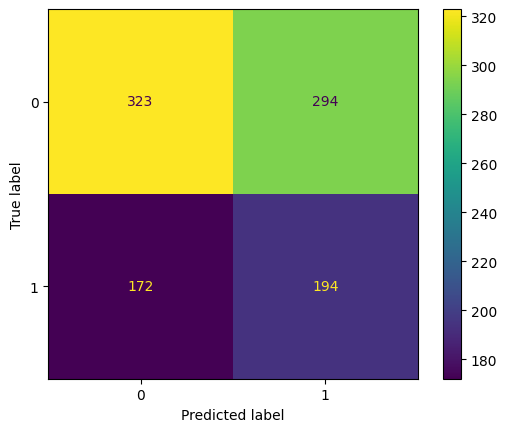

In [28]:
# Confusion Metrics
confusion_LR = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
confusion_LR.plot()